In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import pylab
matplotlib.style.use('ggplot')

In [443]:
patients=pd.read_csv('data/PATIENTS.csv')
print(patients.shape)
print('unique SUBJECT_ID:', patients.SUBJECT_ID.nunique())
patients.head()

(46520, 8)
unique SUBJECT_ID: 46520


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [444]:
patients.isnull().sum()

ROW_ID             0
SUBJECT_ID         0
GENDER             0
DOB                0
DOD            30761
DOD_HOSP       36546
DOD_SSN        33142
EXPIRE_FLAG        0
dtype: int64

In [445]:
patients=patients[['SUBJECT_ID', 'GENDER', 'DOB']]
patients.head()

,SUBJECT_ID,GENDER,DOB
0,249,F,2075-03-13 00:00:00
1,250,F,2164-12-27 00:00:00
2,251,M,2090-03-15 00:00:00
3,252,M,2078-03-06 00:00:00
4,253,F,2089-11-26 00:00:00


In [446]:
admissions=pd.read_csv('data/ADMISSIONS.csv')
admissions=pd.merge(patients, admissions, on=['SUBJECT_ID'])
admissions=admissions.sort_values(by=['ADMITTIME'])
admissions=admissions.reset_index(drop=True)
print(admissions.shape)
print('unique SUBJECT_ID:', admissions.SUBJECT_ID.nunique())
admissions.head()

(58976, 21)
unique SUBJECT_ID: 46520


,SUBJECT_ID,GENDER,DOB,ROW_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,...,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,82574,M,2044-04-23 00:00:00,53486,118464,2100-06-07 19:59:00,2100-06-09 17:09:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,Medicaid,ENGL,CATHOLIC,SINGLE,OTHER,2100-06-07 13:14:00,2100-06-08 00:06:00,HYPOTENSION,0,1
1,29156,M,2028-04-23 00:00:00,35574,161773,2100-06-09 01:39:00,2100-06-19 08:15:00,2100-06-19 08:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,...,Private,CANT,UNOBTAINABLE,MARRIED,WHITE,2100-06-08 23:29:00,2100-06-09 02:34:00,RESPIRATORY DISTRESS,1,1
2,12001,F,2028-10-27 00:00:00,14753,173927,2100-06-14 04:55:00,2100-06-27 12:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,...,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2100-06-14 03:15:00,2100-06-14 05:22:00,RT BASAL GANGLIA BLEEDING,0,1
3,21081,F,2067-04-01 00:00:00,25723,159656,2100-06-14 12:02:00,2100-06-17 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,...,Medicaid,NaN,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2100-06-14 08:36:00,2100-06-14 15:25:00,SHORTNESS OF BREATH,0,1
4,32096,F,2070-12-13 00:00:00,38932,158366,2100-06-22 03:04:00,2100-06-30 11:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,...,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2100-06-21 23:26:00,2100-06-22 08:00:00,"STERNAL FRACTURE,RIB FRACTURE,LACERATIONS",0,1


In [447]:
admissions.isnull().sum()

SUBJECT_ID                  0
GENDER                      0
DOB                         0
ROW_ID                      0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               53122
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                25332
RELIGION                  458
MARITAL_STATUS          10128
ETHNICITY                   0
EDREGTIME               28099
EDOUTTIME               28099
DIAGNOSIS                  25
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64

In [448]:
admissions=admissions.drop(['ROW_ID', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'EDREGTIME', 'EDOUTTIME'], axis=1)
print(admissions.shape)
admissions.head()

(58976, 15)


,SUBJECT_ID,GENDER,DOB,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,82574,M,2044-04-23 00:00:00,118464,2100-06-07 19:59:00,2100-06-09 17:09:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicaid,OTHER,HYPOTENSION,0,1
1,29156,M,2028-04-23 00:00:00,161773,2100-06-09 01:39:00,2100-06-19 08:15:00,2100-06-19 08:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,WHITE,RESPIRATORY DISTRESS,1,1
2,12001,F,2028-10-27 00:00:00,173927,2100-06-14 04:55:00,2100-06-27 12:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,WHITE,RT BASAL GANGLIA BLEEDING,0,1
3,21081,F,2067-04-01 00:00:00,159656,2100-06-14 12:02:00,2100-06-17 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,BLACK/AFRICAN AMERICAN,SHORTNESS OF BREATH,0,1
4,32096,F,2070-12-13 00:00:00,158366,2100-06-22 03:04:00,2100-06-30 11:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,WHITE,"STERNAL FRACTURE,RIB FRACTURE,LACERATIONS",0,1


In [449]:
admissions['HAS_CHARTEVENTS_DATA'].value_counts()

1    57384
0     1592
Name: HAS_CHARTEVENTS_DATA, dtype: int64

In [450]:
admissions=admissions[admissions['HAS_CHARTEVENTS_DATA']==1]
admissions=admissions.drop(['HAS_CHARTEVENTS_DATA'], axis=1)
print(admissions.shape)
admissions.head()

(57384, 14)


,SUBJECT_ID,GENDER,DOB,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG
0,82574,M,2044-04-23 00:00:00,118464,2100-06-07 19:59:00,2100-06-09 17:09:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicaid,OTHER,HYPOTENSION,0
1,29156,M,2028-04-23 00:00:00,161773,2100-06-09 01:39:00,2100-06-19 08:15:00,2100-06-19 08:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,WHITE,RESPIRATORY DISTRESS,1
2,12001,F,2028-10-27 00:00:00,173927,2100-06-14 04:55:00,2100-06-27 12:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,WHITE,RT BASAL GANGLIA BLEEDING,0
3,21081,F,2067-04-01 00:00:00,159656,2100-06-14 12:02:00,2100-06-17 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,BLACK/AFRICAN AMERICAN,SHORTNESS OF BREATH,0
4,32096,F,2070-12-13 00:00:00,158366,2100-06-22 03:04:00,2100-06-30 11:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,WHITE,"STERNAL FRACTURE,RIB FRACTURE,LACERATIONS",0


In [451]:
admissions.columns

Index(['SUBJECT_ID', 'GENDER', 'DOB', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'ETHNICITY', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG'],
      dtype='object')

Duration for each single admission

In [453]:
a=pd.to_datetime(admissions.DISCHTIME)-pd.to_datetime(admissions.ADMITTIME)
admissions['TIMEDELTA']=np.round(a.dt.total_seconds()/86400, 2)
admissions['TIMEDELTA_C']=np.where((admissions['TIMEDELTA']>0)&(admissions['TIMEDELTA']<2), '0-2',
                              np.where((admissions['TIMEDELTA']>=2)&(admissions['TIMEDELTA']<5), '2-5',
                                  np.where((admissions['TIMEDELTA']>=5)&(admissions['TIMEDELTA']<10), '5-10','>10')))
admissions=admissions[['SUBJECT_ID', 'HADM_ID', 'GENDER', 'DOB', 'ADMITTIME', 'DISCHTIME', 'TIMEDELTA', 'TIMEDELTA_C', 
               'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 
               'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG']]
print(admissions.shape)
admissions.head()

(57384, 16)


,SUBJECT_ID,HADM_ID,GENDER,DOB,ADMITTIME,DISCHTIME,TIMEDELTA,TIMEDELTA_C,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG
0,82574,118464,M,2044-04-23 00:00:00,2100-06-07 19:59:00,2100-06-09 17:09:00,1.88,0-2,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicaid,OTHER,HYPOTENSION,0
1,29156,161773,M,2028-04-23 00:00:00,2100-06-09 01:39:00,2100-06-19 08:15:00,10.28,>10,2100-06-19 08:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,WHITE,RESPIRATORY DISTRESS,1
2,12001,173927,F,2028-10-27 00:00:00,2100-06-14 04:55:00,2100-06-27 12:00:00,13.30,>10,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,WHITE,RT BASAL GANGLIA BLEEDING,0
3,21081,159656,F,2067-04-01 00:00:00,2100-06-14 12:02:00,2100-06-17 14:20:00,3.10,2-5,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,BLACK/AFRICAN AMERICAN,SHORTNESS OF BREATH,0
4,32096,158366,F,2070-12-13 00:00:00,2100-06-22 03:04:00,2100-06-30 11:35:00,8.35,5-10,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,WHITE,"STERNAL FRACTURE,RIB FRACTURE,LACERATIONS",0


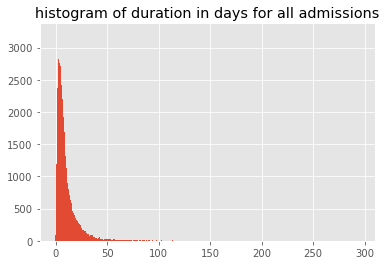

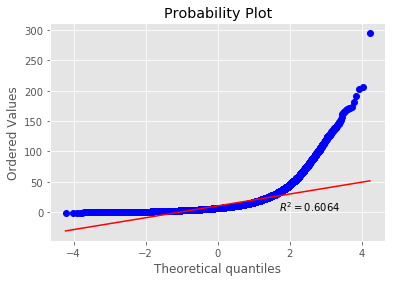

In [454]:
admissions['TIMEDELTA'].hist(bins=600)
plt.title('histogram of duration in days for all admissions')
plt.show()
stats.probplot(admissions['TIMEDELTA'], dist="norm", plot=pylab, rvalue=True)
pylab.show()

Preserve TIMEDELTA>0 and moderate TIMEDELTA

In [455]:
admissions=admissions[np.abs(admissions['TIMEDELTA']-admissions['TIMEDELTA'].mean()) 
                      <= 1*admissions['TIMEDELTA'].std()]
admissions=admissions[admissions['TIMEDELTA']>0]
print(admissions.shape)
admissions.head()

(52071, 16)


,SUBJECT_ID,HADM_ID,GENDER,DOB,ADMITTIME,DISCHTIME,TIMEDELTA,TIMEDELTA_C,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG
0,82574,118464,M,2044-04-23 00:00:00,2100-06-07 19:59:00,2100-06-09 17:09:00,1.88,0-2,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicaid,OTHER,HYPOTENSION,0
1,29156,161773,M,2028-04-23 00:00:00,2100-06-09 01:39:00,2100-06-19 08:15:00,10.28,>10,2100-06-19 08:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,WHITE,RESPIRATORY DISTRESS,1
2,12001,173927,F,2028-10-27 00:00:00,2100-06-14 04:55:00,2100-06-27 12:00:00,13.30,>10,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,WHITE,RT BASAL GANGLIA BLEEDING,0
3,21081,159656,F,2067-04-01 00:00:00,2100-06-14 12:02:00,2100-06-17 14:20:00,3.10,2-5,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,BLACK/AFRICAN AMERICAN,SHORTNESS OF BREATH,0
4,32096,158366,F,2070-12-13 00:00:00,2100-06-22 03:04:00,2100-06-30 11:35:00,8.35,5-10,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,WHITE,"STERNAL FRACTURE,RIB FRACTURE,LACERATIONS",0


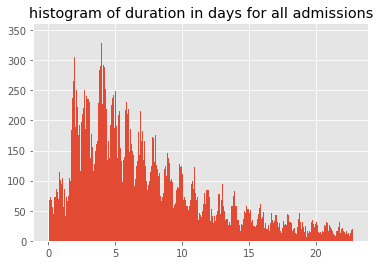

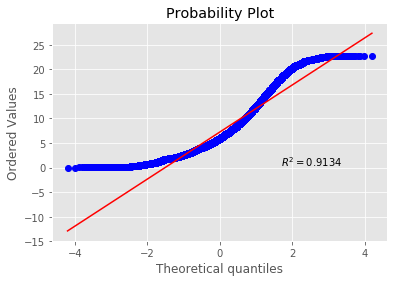

In [456]:
admissions['TIMEDELTA'].hist(bins=600)
plt.title('histogram of duration in days for all admissions')
plt.show()
stats.probplot(admissions['TIMEDELTA'], dist="norm", plot=pylab, rvalue=True)
pylab.show()

Drop duplicate patients (different admissions time)

In [457]:
age=pd.to_datetime(admissions.ADMITTIME)-pd.to_datetime(admissions.DOB)
admissions['AGE_AD']=np.round(age.dt.total_seconds()/31557600, 2)
print(admissions.shape)
admissions.head()

(52071, 17)


,SUBJECT_ID,HADM_ID,GENDER,DOB,ADMITTIME,DISCHTIME,TIMEDELTA,TIMEDELTA_C,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,AGE_AD
0,82574,118464,M,2044-04-23 00:00:00,2100-06-07 19:59:00,2100-06-09 17:09:00,1.88,0-2,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicaid,OTHER,HYPOTENSION,0,56.12
1,29156,161773,M,2028-04-23 00:00:00,2100-06-09 01:39:00,2100-06-19 08:15:00,10.28,>10,2100-06-19 08:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,WHITE,RESPIRATORY DISTRESS,1,72.13
2,12001,173927,F,2028-10-27 00:00:00,2100-06-14 04:55:00,2100-06-27 12:00:00,13.30,>10,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,WHITE,RT BASAL GANGLIA BLEEDING,0,71.63
3,21081,159656,F,2067-04-01 00:00:00,2100-06-14 12:02:00,2100-06-17 14:20:00,3.10,2-5,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,BLACK/AFRICAN AMERICAN,SHORTNESS OF BREATH,0,33.20
4,32096,158366,F,2070-12-13 00:00:00,2100-06-22 03:04:00,2100-06-30 11:35:00,8.35,5-10,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,WHITE,"STERNAL FRACTURE,RIB FRACTURE,LACERATIONS",0,29.52


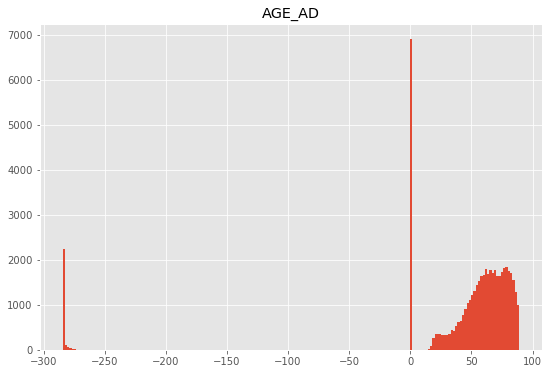

In [458]:
admissions.hist(column='AGE_AD', figsize=(9,6), bins=200)
plt.show()

number admissions of patients older than 89 are negatively coded to preserve privacity

In [459]:
older89=len(admissions[(admissions['AGE_AD']<0)])
older89

2475

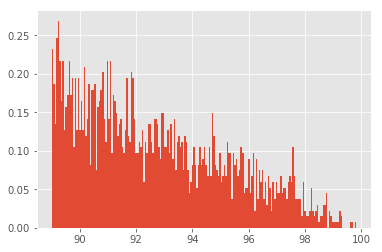

In [460]:
h=plt.hist(np.random.triangular(89.01, 89.01, 100, older89), bins=200, normed=True)
plt.show()

fill random triangular age to patients older than 89

Interested on patients older than 16 

In [461]:
admissions['AGE_AD'] = admissions['AGE_AD'].apply(
                        lambda x: np.random.triangular(89.01, 89.01, 100) if x < 0 else x)
admissions=admissions[admissions['AGE_AD']>16]

(45159, 17)


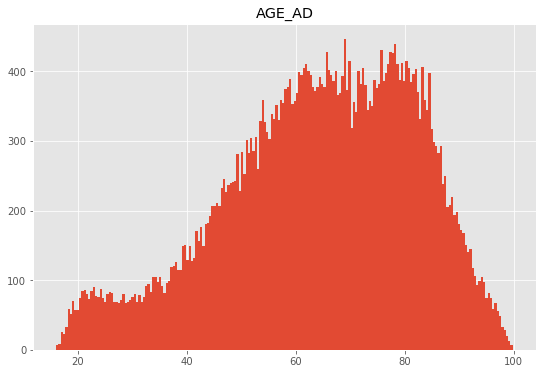

In [462]:
admissions.hist(column='AGE_AD', figsize=(9,6), bins=200)
print(admissions.shape)
plt.show()

In [463]:
admissions['AGE_C'] = np.where((admissions['AGE_AD'] > 16)&(admissions['AGE_AD'] <= 40), '16-40',
                       np.where((admissions['AGE_AD'] > 40)&(admissions['AGE_AD'] <= 60), '40-60',
                        np.where((admissions['AGE_AD'] > 60)&(admissions['AGE_AD'] <= 80), '60-80', 'aged (>80)')))

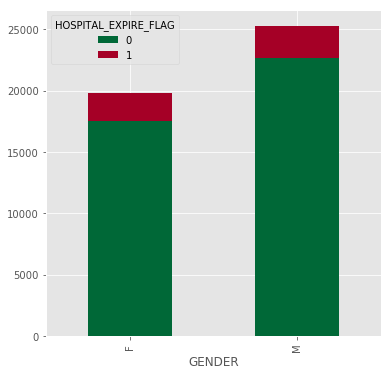

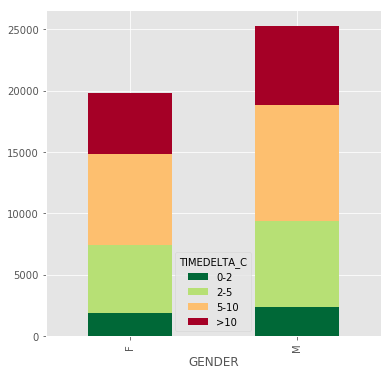

In [464]:
carat_table = pd.crosstab(index=admissions["GENDER"], 
                          columns=admissions["HOSPITAL_EXPIRE_FLAG"])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()
carat_table = pd.crosstab(index=admissions["GENDER"], 
                          columns=admissions["TIMEDELTA_C"])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()

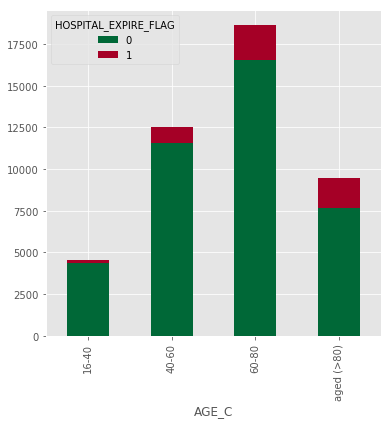

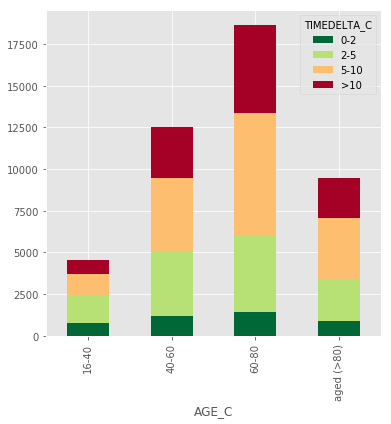

In [466]:
carat_table = pd.crosstab(index=admissions["AGE_C"], 
                          columns=admissions["HOSPITAL_EXPIRE_FLAG"])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()
carat_table = pd.crosstab(index=admissions["AGE_C"], 
                          columns=admissions["TIMEDELTA_C"])
#carat_table=carat_table.reindex(["young", "20-60", "60-89", 'aged (>89)'])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()

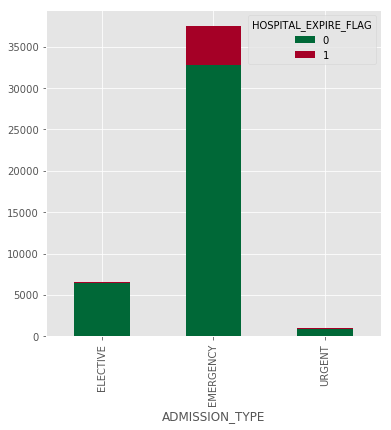

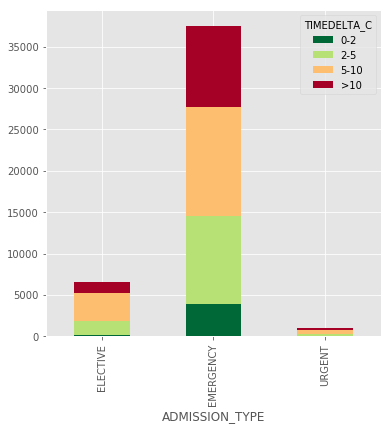

In [467]:
carat_table = pd.crosstab(index=admissions["ADMISSION_TYPE"], 
                          columns=admissions["HOSPITAL_EXPIRE_FLAG"])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()
carat_table = pd.crosstab(index=admissions["ADMISSION_TYPE"], 
                          columns=admissions["TIMEDELTA_C"])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()

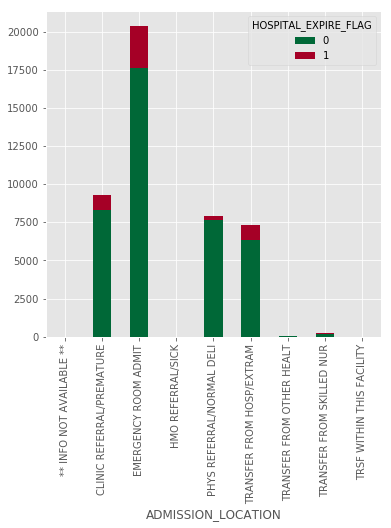

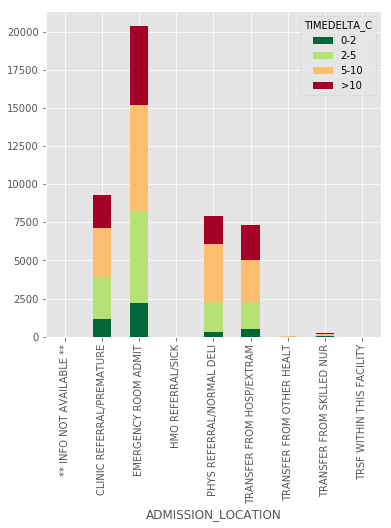

In [468]:
carat_table = pd.crosstab(index=admissions["ADMISSION_LOCATION"], 
                          columns=admissions["HOSPITAL_EXPIRE_FLAG"])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()
carat_table = pd.crosstab(index=admissions["ADMISSION_LOCATION"], 
                          columns=admissions["TIMEDELTA_C"])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()

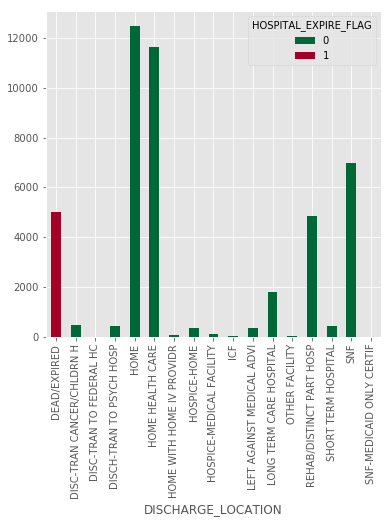

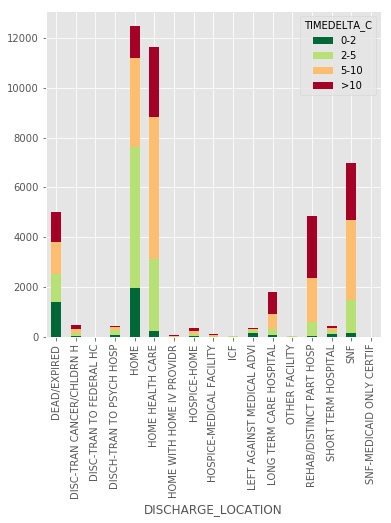

In [469]:
carat_table = pd.crosstab(index=admissions["DISCHARGE_LOCATION"], 
                          columns=admissions["HOSPITAL_EXPIRE_FLAG"])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()
carat_table = pd.crosstab(index=admissions["DISCHARGE_LOCATION"], 
                          columns=admissions["TIMEDELTA_C"])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()

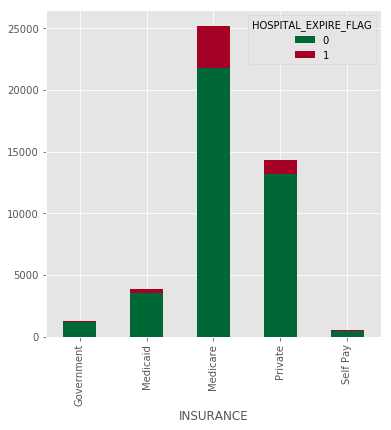

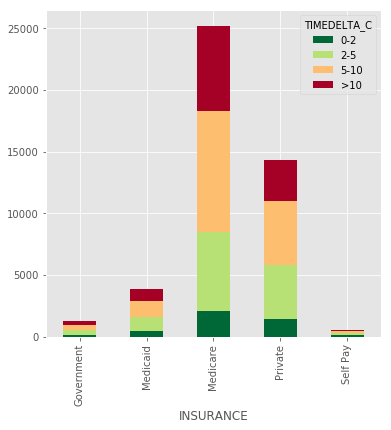

In [470]:
carat_table = pd.crosstab(index=admissions["INSURANCE"], 
                          columns=admissions["HOSPITAL_EXPIRE_FLAG"])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()
carat_table = pd.crosstab(index=admissions["INSURANCE"], 
                          columns=admissions["TIMEDELTA_C"])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()

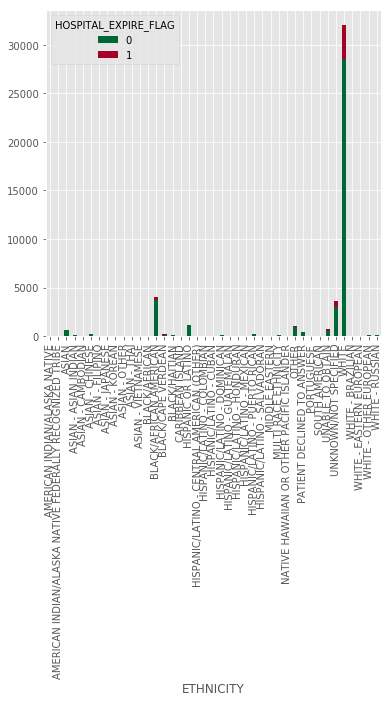

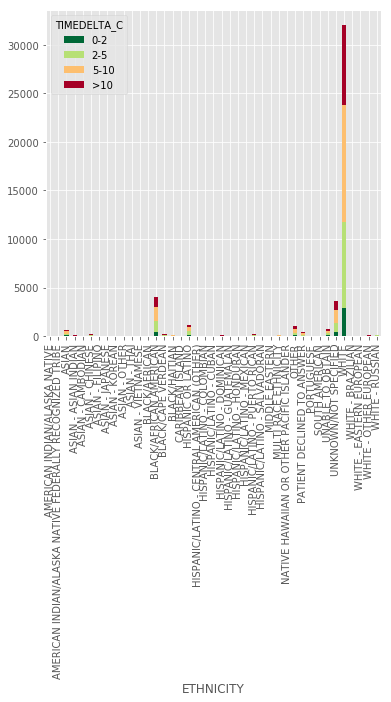

In [472]:
carat_table = pd.crosstab(index=admissions["ETHNICITY"], 
                          columns=admissions["HOSPITAL_EXPIRE_FLAG"])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()
carat_table = pd.crosstab(index=admissions["ETHNICITY"], 
                          columns=admissions["TIMEDELTA_C"])
carat_table.plot(kind="bar", figsize=(6,6), stacked=True, colormap='RdYlGn_r')
plt.show()

In [479]:
print(admissions.shape)
admissions.head()

(45159, 18)


,SUBJECT_ID,HADM_ID,GENDER,DOB,ADMITTIME,DISCHTIME,TIMEDELTA,TIMEDELTA_C,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,AGE_AD,AGE_C
0,82574,118464,M,2044-04-23 00:00:00,2100-06-07 19:59:00,2100-06-09 17:09:00,1.88,0-2,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicaid,OTHER,HYPOTENSION,0,56.12,40-60
1,29156,161773,M,2028-04-23 00:00:00,2100-06-09 01:39:00,2100-06-19 08:15:00,10.28,>10,2100-06-19 08:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,WHITE,RESPIRATORY DISTRESS,1,72.13,60-80
2,12001,173927,F,2028-10-27 00:00:00,2100-06-14 04:55:00,2100-06-27 12:00:00,13.30,>10,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,WHITE,RT BASAL GANGLIA BLEEDING,0,71.63,60-80
3,21081,159656,F,2067-04-01 00:00:00,2100-06-14 12:02:00,2100-06-17 14:20:00,3.10,2-5,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,BLACK/AFRICAN AMERICAN,SHORTNESS OF BREATH,0,33.20,16-40
4,32096,158366,F,2070-12-13 00:00:00,2100-06-22 03:04:00,2100-06-30 11:35:00,8.35,5-10,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,WHITE,"STERNAL FRACTURE,RIB FRACTURE,LACERATIONS",0,29.52,16-40


In [480]:
admissions.HOSPITAL_EXPIRE_FLAG.value_counts()

0    40134
1     5025
Name: HOSPITAL_EXPIRE_FLAG, dtype: int64

In [481]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
GENDER                      0
DOB                         0
ADMITTIME                   0
DISCHTIME                   0
TIMEDELTA                   0
TIMEDELTA_C                 0
DEATHTIME               40134
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   4
HOSPITAL_EXPIRE_FLAG        0
AGE_AD                      0
AGE_C                       0
dtype: int64

In [482]:
print('unique subject id:', admissions.SUBJECT_ID.nunique())
print('unique hadmiss id:', admissions.HADM_ID.nunique())

unique subject id: 36055
unique hadmiss id: 45159


We have patients with different hospital admissions id